# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words

### Analysis

In [1]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('expanded_dtm.pkl')
data = data.transpose()
data.head()

,ali,amy,anthony,bill,bo,dave,eddie,hasan,iliza,jerry,...,john,kevin,louis,margaret,mike,patton,ricky,ronny,tiffany,trevor
aah,0,0,0,0,0,0,0,0,0,0,...,0,3,3,0,0,0,0,0,0,0
able,2,0,0,1,0,0,0,0,0,0,...,3,2,1,0,0,0,2,0,0,0
absolutely,0,0,0,3,0,0,0,0,0,0,...,1,2,0,0,0,0,0,0,0,0
absurdities,1,0,1,0,0,1,0,0,0,0,...,1,1,1,0,1,0,1,0,0,0
absurdities sharp,1,0,1,0,0,1,0,0,0,0,...,1,1,1,0,1,0,1,0,0,0


In [2]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'ali': [('like', np.int64(127)),
  ('im', np.int64(74)),
  ('know', np.int64(68)),
  ('just', np.int64(64)),
  ('dont', np.int64(61)),
  ('thats', np.int64(34)),
  ('shit', np.int64(34)),
  ('youre', np.int64(31)),
  ('gonna', np.int64(28)),
  ('ok', np.int64(26)),
  ('lot', np.int64(24)),
  ('gotta', np.int64(21)),
  ('wanna', np.int64(21)),
  ('oh', np.int64(21)),
  ('husband', np.int64(20)),
  ('got', np.int64(19)),
  ('right', np.int64(19)),
  ('time', np.int64(19)),
  ('cause', np.int64(18)),
  ('women', np.int64(17)),
  ('day', np.int64(17)),
  ('people', np.int64(16)),
  ('pregnant', np.int64(15)),
  ('oh god', np.int64(14)),
  ('hes', np.int64(14)),
  ('god', np.int64(14)),
  ('need', np.int64(14)),
  ('tell', np.int64(13)),
  ('yeah', np.int64(13)),
  ('dont know', np.int64(12))],
 'amy': [('zombies', np.int64(0)),
  ('aah', np.int64(0)),
  ('able', np.int64(0)),
  ('youre free', np.int64(0)),
  ('youre fucking', np.int64(0)),
  ('youre getting', np.int64(0)),
  ('youre going

In [3]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

ali
like, im, know, just, dont, thats, shit, youre, gonna, ok, lot, gotta, wanna, oh
---
amy
zombies, aah, able, youre free, youre fucking, youre getting, youre going, youre gonna, youre good, youre guy, youre having, youre bad, youre big, youre blind
---
anthony
im, like, know, dont, joke, got, thats, said, just, anthony, day, say, guys, people
---
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
---
bo
zombies, aah, able, youre free, youre fucking, youre getting, youre going, youre gonna, youre good, youre guy, youre having, youre bad, youre big, youre blind
---
dave
like, know, said, just, im, shit, people, didnt, dont, time, fuck, thats, fucking, black
---
eddie
zombies, aah, able, youre free, youre fucking, youre getting, youre going, youre gonna, youre good, youre guy, youre having, youre bad, youre big, youre blind
---
hasan
zombies, aah, able, youre free, youre fucking, youre getting, youre going, youre gonna, youre good, youre guy, yo

**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



In [4]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'shit',
 'youre',
 'gonna',
 'ok',
 'lot',
 'gotta',
 'wanna',
 'oh',
 'husband',
 'got',
 'right',
 'time',
 'cause',
 'women',
 'day',
 'people',
 'pregnant',
 'oh god',
 'hes',
 'god',
 'need',
 'tell',
 'yeah',
 'dont know',
 'zombies',
 'aah',
 'able',
 'youre free',
 'youre fucking',
 'youre getting',
 'youre going',
 'youre gonna',
 'youre good',
 'youre guy',
 'youre having',
 'youre bad',
 'youre big',
 'youre blind',
 'youre dealing',
 'youre doing',
 'youre eating',
 'youre fcking',
 'youre fine',
 'youd think',
 'youll',
 'young',
 'young age',
 'young man',
 'younger',
 'youngest',
 'youre',
 'yesterday',
 'yo',
 'yoga',
 'im',
 'like',
 'know',
 'dont',
 'joke',
 'got',
 'thats',
 'said',
 'just',
 'anthony',
 'day',
 'say',
 'guys',
 'people',
 'youre',
 'tell',
 'grandma',
 'right',
 'thing',
 'think',
 'time',
 'jokes',
 'school',
 'good',
 'did',
 'yeah',
 'okay',
 'baby',
 'gonna',
 'ive',
 'like',
 'just',
 'righ

In [5]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('youre', 20),
 ('like', 11),
 ('im', 11),
 ('know', 11),
 ('just', 11),
 ('dont', 11),
 ('thats', 11),
 ('right', 11),
 ('people', 11),
 ('zombies', 11),
 ('aah', 11),
 ('able', 11),
 ('youre free', 11),
 ('youre fucking', 11),
 ('youre getting', 11),
 ('youre going', 11),
 ('youre gonna', 11),
 ('youre good', 11),
 ('youre guy', 11),
 ('youre having', 11),
 ('youre bad', 11),
 ('youre big', 11),
 ('youre blind', 11),
 ('youre dealing', 11),
 ('youre doing', 11),
 ('youre eating', 11),
 ('youre fcking', 11),
 ('youre fine', 11),
 ('youd think', 11),
 ('youll', 11),
 ('young', 11),
 ('young age', 11),
 ('young man', 11),
 ('younger', 11),
 ('youngest', 11),
 ('yesterday', 11),
 ('yo', 11),
 ('yoga', 11),
 ('got', 10),
 ('gonna', 9),
 ('time', 8),
 ('said', 7),
 ('think', 7),
 ('shit', 6),
 ('oh', 6),
 ('cause', 6),
 ('yeah', 6),
 ('going', 6),
 ('day', 5),
 ('hes', 5),
 ('dont know', 5),
 ('say', 5),
 ('thing', 5),
 ('good', 5),
 ('didnt', 5),
 ('theyre', 5),
 ('theres', 5),
 ('fuckin

In [6]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 10]
add_stop_words

['youre',
 'like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'zombies',
 'aah',
 'able',
 'youre free',
 'youre fucking',
 'youre getting',
 'youre going',
 'youre gonna',
 'youre good',
 'youre guy',
 'youre having',
 'youre bad',
 'youre big',
 'youre blind',
 'youre dealing',
 'youre doing',
 'youre eating',
 'youre fcking',
 'youre fine',
 'youd think',
 'youll',
 'young',
 'young age',
 'young man',
 'younger',
 'youngest',
 'yesterday',
 'yo',
 'yoga']

In [7]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import pickle

# Read in cleaned data
data_clean = pd.read_pickle('expanded_data_clean.pkl')

# Add new stop words
stop_words = list(text.ENGLISH_STOP_WORDS.union(add_stop_words))

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")


c:\Users\adity\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['age', 'bad', 'big', 'blind', 'dealing', 'doing', 'eating', 'fcking', 'fine', 'free', 'fucking', 'getting', 'going', 'gonna', 'good', 'guy', 'having', 'man', 'think', 'youd'] not in stop_words.
  warnings.warn(


In [8]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)


IndexError: index 20 is out of bounds for axis 0 with size 20

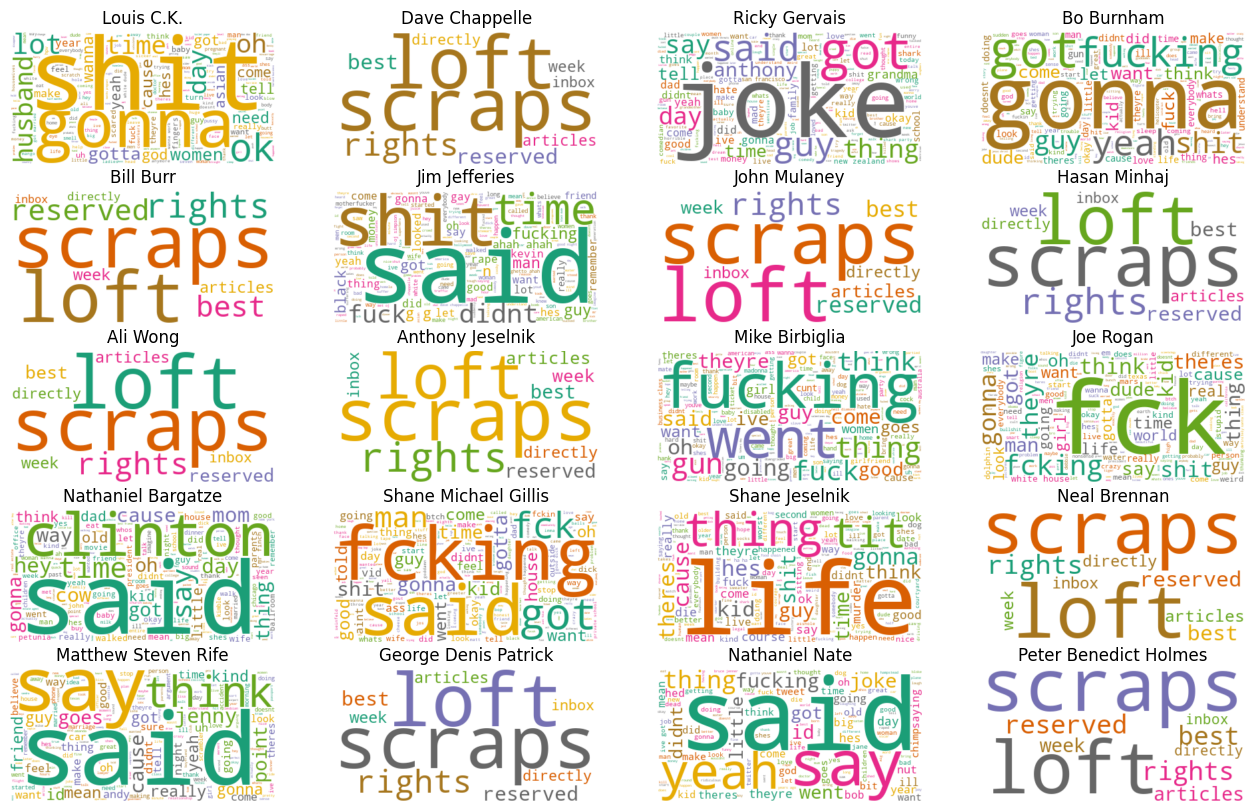

In [10]:
import matplotlib.pyplot as plt

# Set plot dimensions
plt.rcParams['figure.figsize'] = [16, 10]

# Full names of the 20 comedians
full_names = ['Louis C.K.', 'Dave Chappelle', 'Ricky Gervais', 'Bo Burnham', 'Bill Burr', 'Jim Jefferies',
              'John Mulaney', 'Hasan Minhaj', 'Ali Wong', 'Anthony Jeselnik', 'Mike Birbiglia', 'Joe Rogan',
              'Nathaniel Bargatze', 'Shane Michael Gillis', 'Shane Jeselnik', 'Neal Brennan', 'Matthew Steven Rife', 'George Denis Patrick',
              'Nathaniel Nate', 'Peter Benedict Holmes']

# Create subplots for each comedian
fig, axes = plt.subplots(5, 4, figsize=(16, 10))  # Adjust grid for 5 rows and 4 columns
axes = axes.flatten()  # Flatten axes for easier indexing

for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    axes[index].imshow(wc, interpolation="bilinear")
    axes[index].axis("off")
    axes[index].set_title(full_names[index])

plt.tight_layout()
plt.show()


pete davidson uses lot of f words and talks on female(mom shes)
jog rogan  uses lot of f words
gabriel iglesias uses word related to story telling "going" "said" "cause"


### Findings

* Ali Wong says the s-word a lot and talks about her husband. I guess that's funny to me.
* A lot of people use the F-word. Let's dig into that later.

## Number of Words

### Analysis

In [11]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,Dave Chappelle,0
7,Hasan Minhaj,0
6,John Mulaney,0
4,Bill Burr,0
9,Anthony Jeselnik,0
15,Neal Brennan,0
8,Ali Wong,0
17,George Denis Patrick,0
19,Peter Benedict Holmes,0
2,Ricky Gervais,1448


In [12]:
# Comedy special run times in minutes (updated with 20 run times for your comedians)
run_times = [60, 59, 57, 80, 60, 70, 67, 115, 77, 63, 57, 62, 58, 69, 54, 75, 56, 76, 68, 50]

# Calculate the total number of words for each comedian
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Add columns to the dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort


ValueError: Length of values (22) does not match length of index (20)

NameError: name 'data_wpm_sort' is not defined

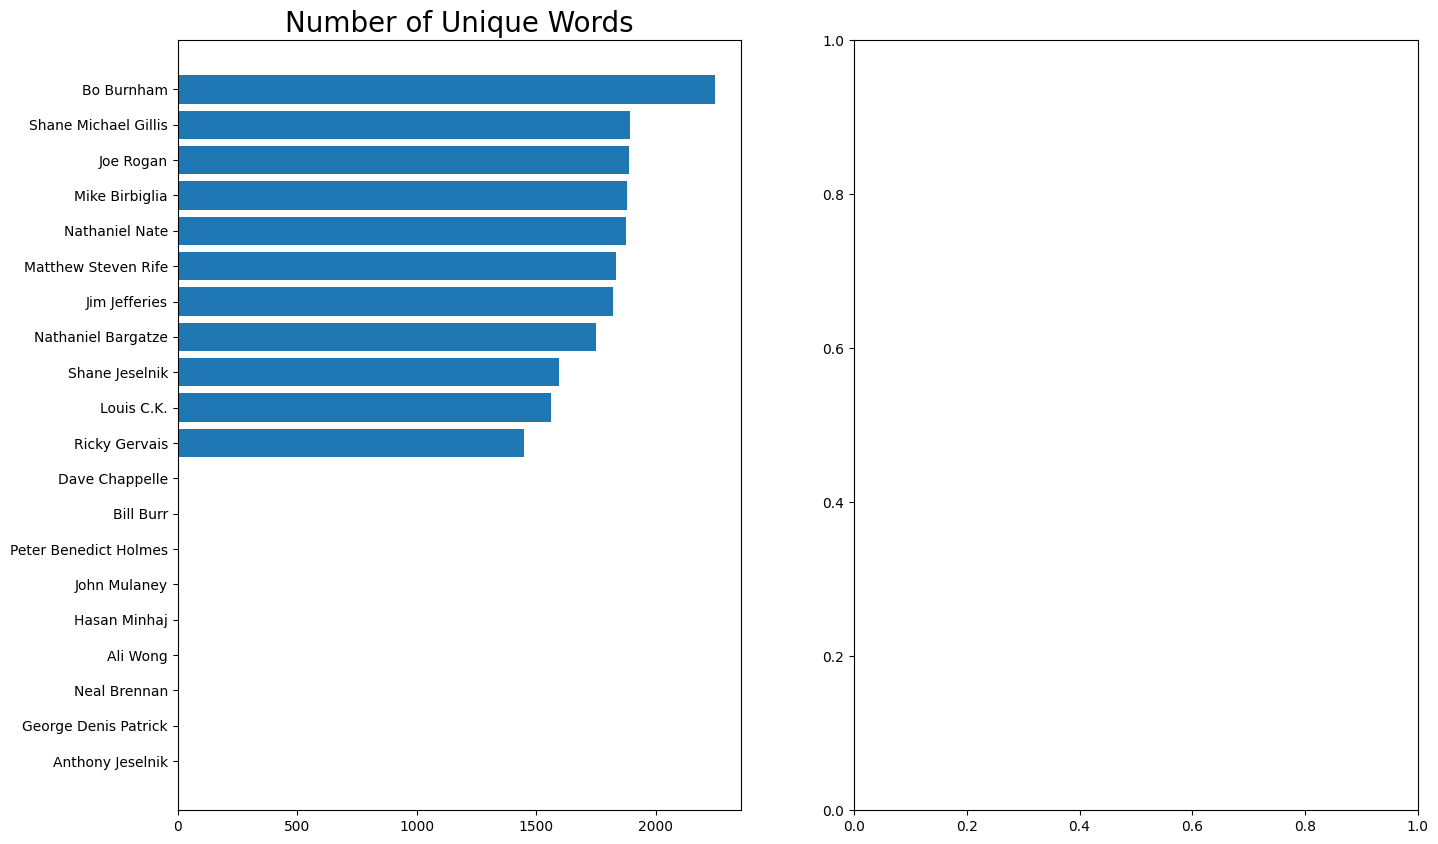

In [13]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

### Findings

* **Vocabulary**
   * Gabriel lglesias (British comedy) and Bill Burr (podcast host) use a lot of words in their comedy
   * Hasan Minhaj(self-depricating comedy) and Bo Burnham(dark humor) have a smaller vocabulary


* **Talking Speed**
   * Kevin Hart(blue comedy) and Jim jefferies(podcast host) talk fast
   * Bo Burnham (musical comedy) and Hasan Minhaj(dark humor) talk slow
   
Ali Wong is somewhere in the middle in both cases. Nothing too interesting here.

## Amount of Profanity

### Analysis

In [15]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('day', 13),
 ('shit', 12),
 ('thing', 12),
 ('little', 11),
 ('fuck', 10),
 ('oh', 10),
 ('cause', 10),
 ('make', 9),
 ('guys', 8),
 ('man', 8),
 ('really', 8),
 ('went', 7),
 ('fucking', 7),
 ('old', 7),
 ('ill', 7),
 ('love', 7),
 ('kids', 6),
 ('gotta', 6),
 ('okay', 6),
 ('mom', 6),
 ('youre like', 5),
 ('woman', 5),
 ('god', 5),
 ('uh', 5),
 ('women', 5),
 ('white', 5),
 ('accident', 4),
 ('joke', 4),
 ('funny', 4),
 ('need', 4),
 ('bad', 4),
 ('baby', 4),
 ('dude', 4),
 ('yes', 4),
 ('kid', 4),
 ('zoo', 3),
 ('aaah', 3),
 ('aah', 3),
 ('ability', 3),
 ('able', 3),
 ('able write', 3),
 ('absolute', 3),
 ('absolutely', 3),
 ('absurdities everyday', 3),
 ('abuse', 3),
 ('accent', 3),
 ('acceptable', 3),
 ('acceptable answer', 3),
 ('accepted', 3),
 ('access', 3),
 ('youre lying', 3),
 ('youre making', 3),
 ('youre married', 3),
 ('youre offended', 3),
 ('youre old', 3),
 ('youre people', 3),
 ('youre probably', 3),
 ('youre really', 3),
 ('youre im', 3),
 ('youre just', 3),
 ('you

In [16]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
George,0,0
Jeselnik,18,10
Matthew,77,25
Nate,0,0
Nathaniel,0,0
Neal,25,10
Peter,16,12
Shane,0,12
ali,16,34
anthony,15,9


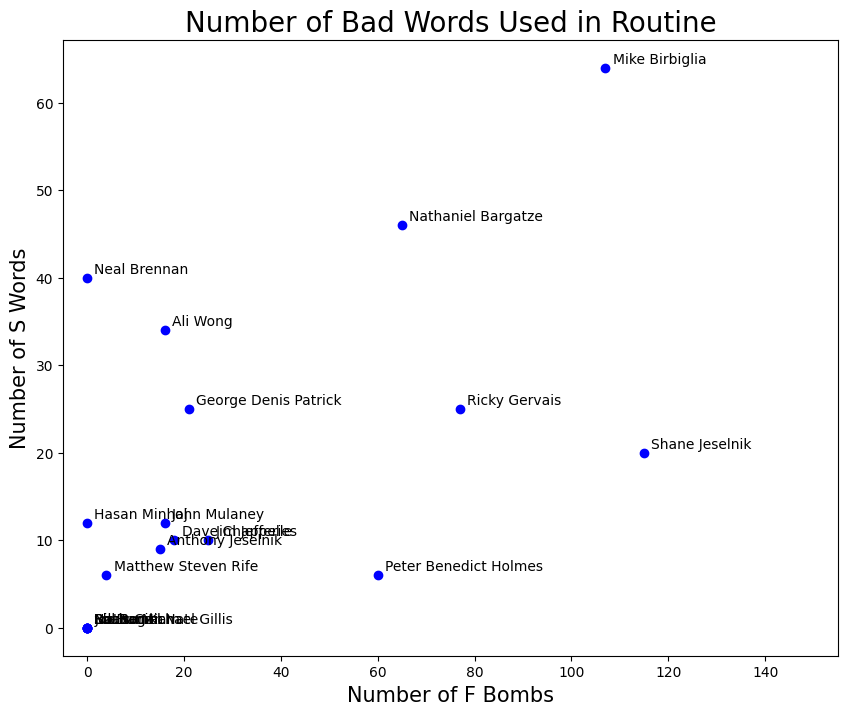

In [17]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

### Findings

* **Averaging 2 F-Bombs Per Minute!** - I don't like too much swearing, especially the f-word, which is probably why I've never heard of Bill Bur, Joe Rogan and Jim Jefferies.
* **Clean Humor** - It looks like profanity might be a good predictor of the type of comedy I like. Besides Ali Wong, my two other favorite comedians in this group are John Mulaney and Mike Birbiglia.

## Side Note

What was our goal for the EDA portion of our journey? **To be able to take an initial look at our data and see if the results of some basic analysis made sense.**

My conclusion - yes, it does, for a first pass. There are definitely some things that could be better cleaned up, such as adding more stop words or including bi-grams. But we can save that for another day. The results, especially the profanity findings, are interesting and make general sense, so we're going to move on.

As a reminder, the data science process is an interative one. It's better to see some non-perfect but acceptable results to help you quickly decide whether your project is a dud or not, instead of having analysis paralysis and never delivering anything.

**Alice's data science (and life) motto: Let go of perfectionism!**

## Additional Exercises

1. What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

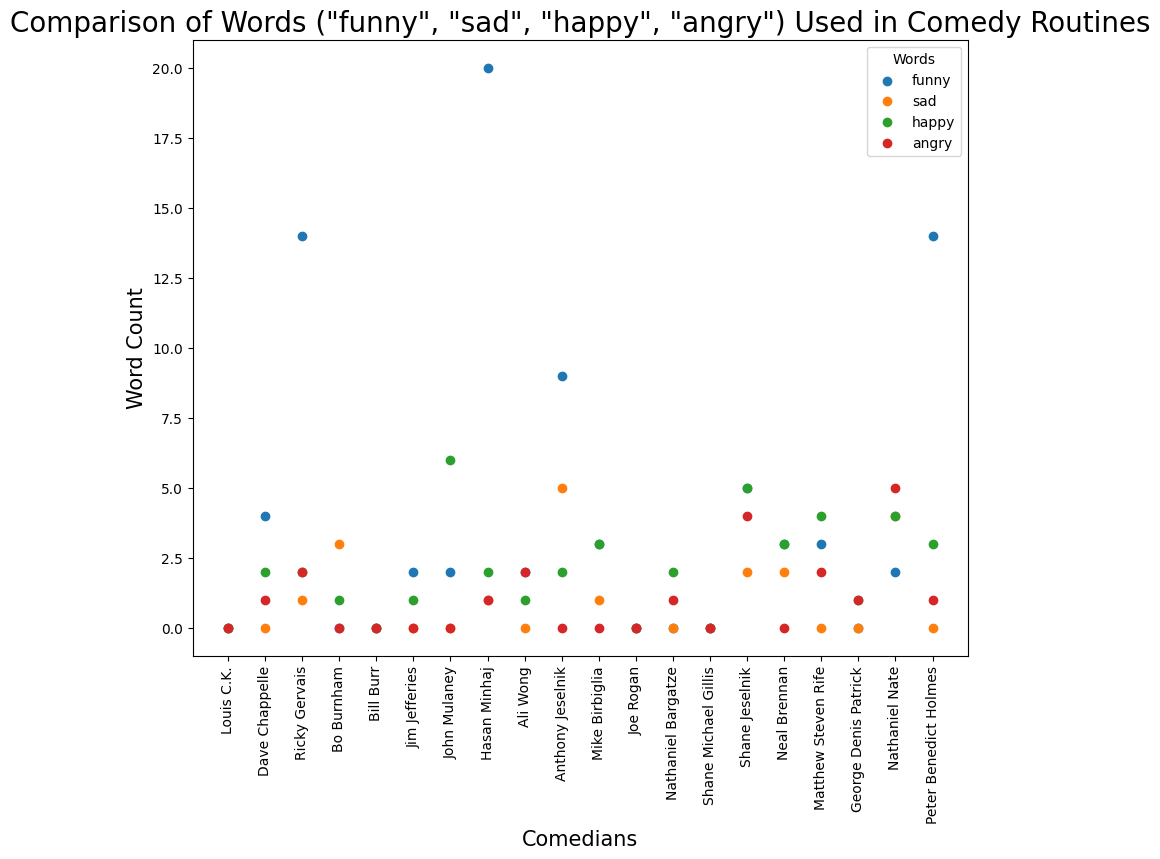

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Words to count
words_to_count = ['funny', 'sad', 'happy', 'angry']

# Extract the counts of these words for each comedian
data_words_counts = {word: [] for word in words_to_count}

for comedian in data.columns:
    word_counts = []
    for word in words_to_count:
        word_count = data[comedian].loc[word] if word in data.index else 0  # Handle missing words
        word_counts.append(word_count)
    
    for i, word in enumerate(words_to_count):
        data_words_counts[word].append(word_counts[i])

# Create a DataFrame from the word counts
data_word_counts_df = pd.DataFrame(data_words_counts)
data_word_counts_df['comedian'] = full_names  # Add comedian names
data_word_counts_df.set_index('comedian', inplace=True)

# Plotting the scatter plot
plt.figure(figsize=[10, 8])

# Scatter plot for each word count
for word in words_to_count:
    plt.scatter(data_word_counts_df.index, data_word_counts_df[word], label=word)

plt.title('Comparison of Words ("funny", "sad", "happy", "angry") Used in Comedy Routines', fontsize=20)
plt.xlabel('Comedians', fontsize=15)
plt.ylabel('Word Count', fontsize=15)
plt.xticks(rotation=90)  # Rotate comedian names for better readability
plt.legend(title='Words')

plt.show()


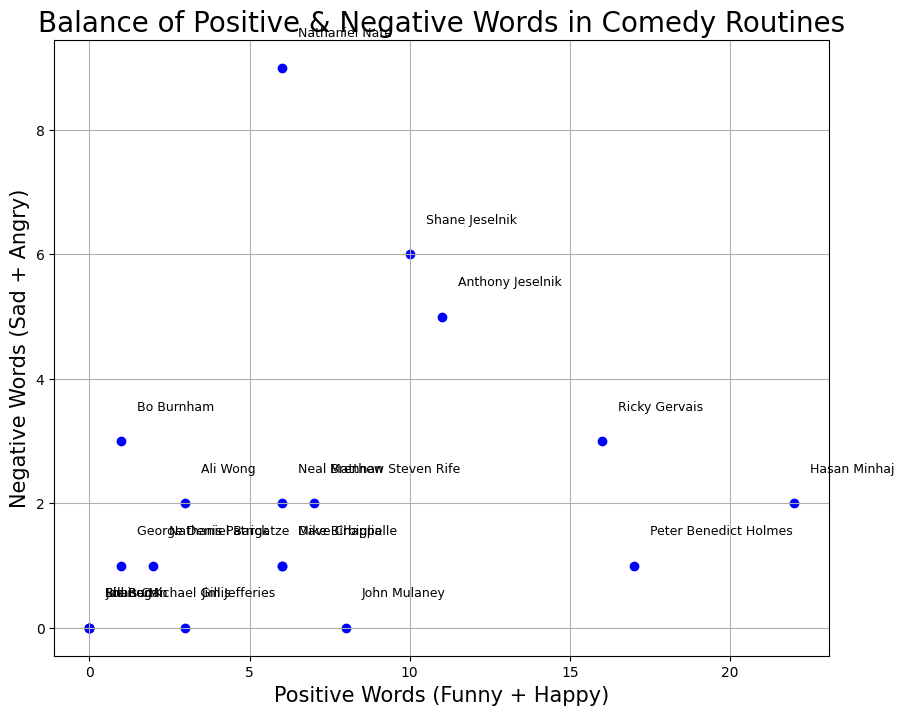

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Words to count
words_to_count = ['funny', 'sad', 'happy', 'angry']

# Extract the counts of these words for each comedian
data_words_counts = {word: [] for word in words_to_count}

for comedian in data.columns:
    word_counts = []
    for word in words_to_count:
        word_count = data[comedian].loc[word] if word in data.index else 0  # Handle missing words
        word_counts.append(word_count)
    
    for i, word in enumerate(words_to_count):
        data_words_counts[word].append(word_counts[i])

# Create a DataFrame from the word counts
data_word_counts_df = pd.DataFrame(data_words_counts)
data_word_counts_df['comedian'] = full_names  # Add comedian names
data_word_counts_df.set_index('comedian', inplace=True)

# Plotting the scatter plot
plt.figure(figsize=[10, 8])

# Scatter plot: X-axis (Positive words) vs. Y-axis (Negative words)
for i, comedian in enumerate(data_word_counts_df.index):
    x = data_word_counts_df.loc[comedian, 'funny'] + data_word_counts_df.loc[comedian, 'happy']  # Positive words
    y = data_word_counts_df.loc[comedian, 'sad'] + data_word_counts_df.loc[comedian, 'angry']   # Negative words
    plt.scatter(x, y, color='blue')
    plt.text(x + 0.5, y + 0.5, comedian, fontsize=9)  # Offset text slightly for readability

# Labels and titles
plt.title('Balance of Positive & Negative Words in Comedy Routines', fontsize=20)
plt.xlabel('Positive Words (Funny + Happy)', fontsize=15)
plt.ylabel('Negative Words (Sad + Angry)', fontsize=15)

# Grid and layout
plt.grid(True)
plt.show()


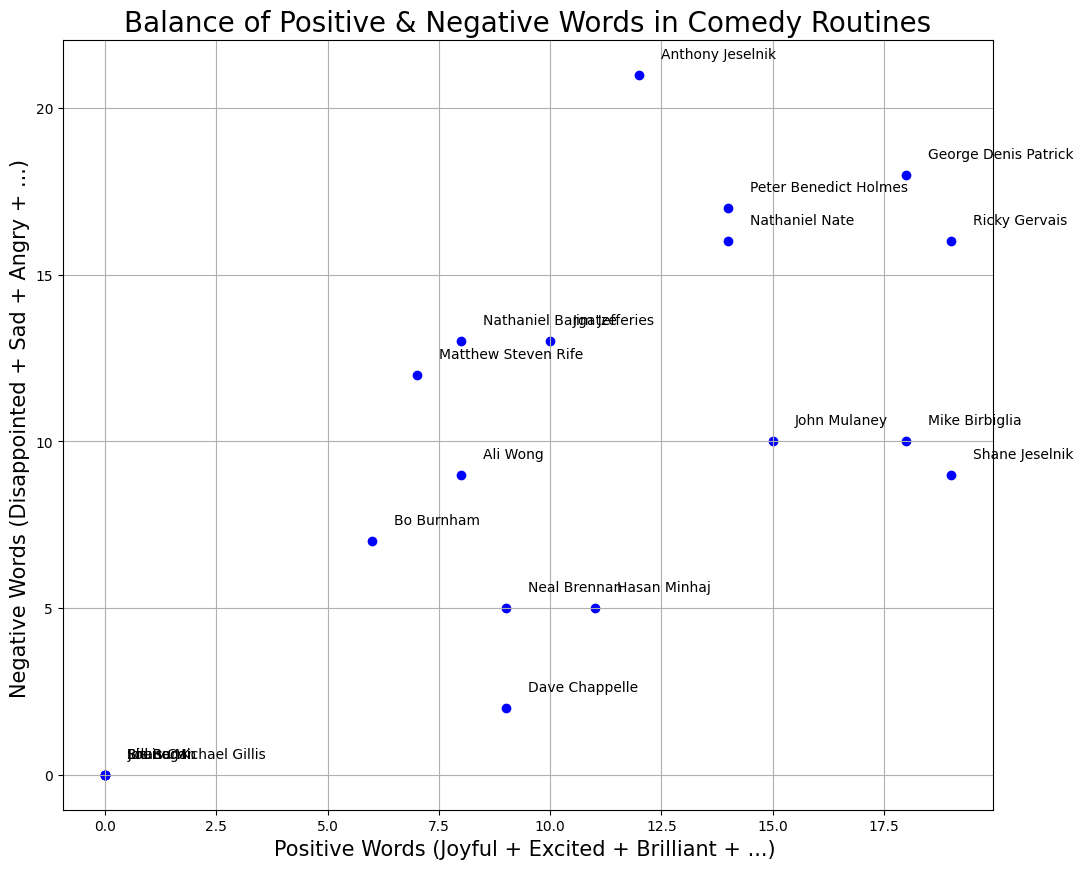

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Words to count (New categories with more words)
positive_words = ['joyful', 'excited', 'brilliant', 'amazing', 'love', 'good', 'great', 'hilarious']
negative_words = ['disappointed', 'sad', 'angry', 'awful', 'terrible', 'bad', 'miserable', 'upset']

# Extract the counts of these words for each comedian
data_words_counts = {word: [] for word in positive_words + negative_words}

for comedian in data.columns:
    word_counts = []
    for word in positive_words + negative_words:
        word_count = data[comedian].loc[word] if word in data.index else 0  # Handle missing words
        word_counts.append(word_count)
    
    for i, word in enumerate(positive_words + negative_words):
        data_words_counts[word].append(word_counts[i])

# Create a DataFrame from the word counts
data_word_counts_df = pd.DataFrame(data_words_counts)
data_word_counts_df['comedian'] = full_names  # Add comedian names
data_word_counts_df.set_index('comedian', inplace=True)

# Plotting the scatter plot
plt.figure(figsize=[12, 10])

# Scatter plot: X-axis (Positive words) vs. Y-axis (Negative words)
for i, comedian in enumerate(data_word_counts_df.index):
    # Sum positive words for the x-axis and negative words for the y-axis
    x = sum([data_word_counts_df.loc[comedian, word] for word in positive_words])  # Positive words
    y = sum([data_word_counts_df.loc[comedian, word] for word in negative_words])  # Negative words
    plt.scatter(x, y, color='blue')
    plt.text(x + 0.5, y + 0.5, comedian, fontsize=10)  # Offset text slightly for readability

# Labels and titles
plt.title('Balance of Positive & Negative Words in Comedy Routines', fontsize=20)
plt.xlabel('Positive Words (Joyful + Excited + Brilliant + ...) ', fontsize=15)
plt.ylabel('Negative Words (Disappointed + Sad + Angry + ...) ', fontsize=15)

# Grid and layout
plt.grid(True)
plt.show()

all comedians uses positive words more than negative.
Anthony uses lot of positive words and moderate negative words

<Figure size 1200x800 with 0 Axes>

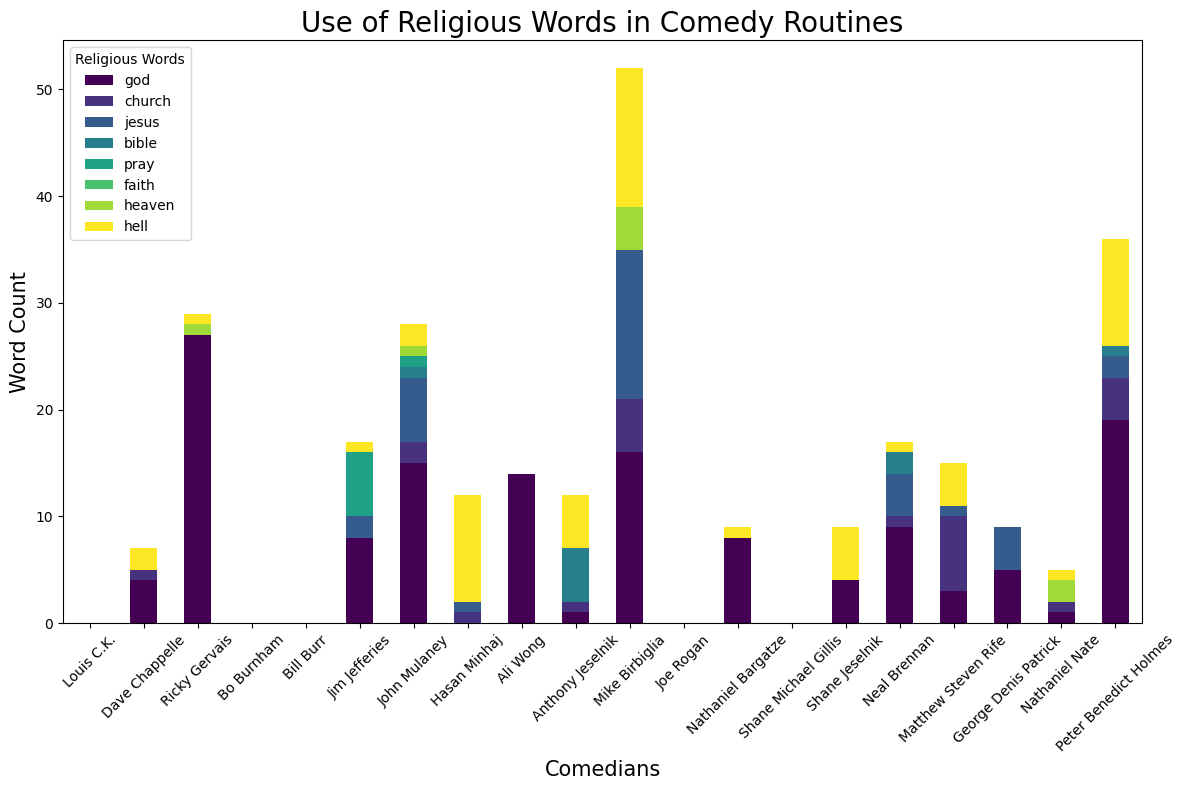

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Words to count (Religious context)
religious_words = ['god', 'church', 'jesus', 'bible', 'pray', 'faith', 'heaven', 'hell']

# Extract the counts of these words for each comedian
religious_word_counts = {word: [] for word in religious_words}

for comedian in data.columns:
    word_counts = []
    for word in religious_words:
        word_count = data[comedian].loc[word] if word in data.index else 0  # Handle missing words
        word_counts.append(word_count)
    
    for i, word in enumerate(religious_words):
        religious_word_counts[word].append(word_counts[i])

# Create a DataFrame from the word counts
religious_counts_df = pd.DataFrame(religious_word_counts)
religious_counts_df['comedian'] = full_names  # Add comedian names
religious_counts_df.set_index('comedian', inplace=True)

# Plotting the bar chart
plt.figure(figsize=[12, 8])
religious_counts_df.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Labels and titles
plt.title('Use of Religious Words in Comedy Routines', fontsize=20)
plt.xlabel('Comedians', fontsize=15)
plt.ylabel('Word Count', fontsize=15)
plt.xticks(rotation=45)
plt.legend(title='Religious Words')

plt.tight_layout()
plt.show()


Anthony uses a lot of religious words.